In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
colors = np.array([(22,98,248), (48,141,250), (71,172,251), (100,201,252), (129,222,253),(162,240,254), (215,249,253), (255,255,255), 
                   (255,255,255), (255,249,217), (247,236,155), (254,221,128), (254,202,100), (255,173,71), (252,142,42), (255,101,15)])/255
custom_cmap = LinearSegmentedColormap.from_list('cmap', colors)

def decadal_trend_finder(RO_anomaly_ts):
    time = np.shape(RO_anomaly_ts)[0]
    latitude = np.shape(RO_anomaly_ts)[1]
    heights = np.shape(RO_anomaly_ts)[2]
    trend_map = []
    for lat in range(0, latitude):
        trends_at_lat = []
        for height in range(0,heights):
            RO_data = RO_anomaly_ts[:,lat,height]
            x_points = np.arange(0,time)
            RO_data_nonnan = RO_data[~np.isnan(RO_data)]
            x_points_nonnan = x_points[~np.isnan(RO_data)]
            try:
                trend = stats.linregress(x_points_nonnan, RO_data_nonnan)[0]
            except:
                trend = np.NaN
            decadal_trend = trend*12*10 # x12 for months x10 for decade
            trends_at_lat.append(decadal_trend)
        trend_map.append(trends_at_lat)
    return(np.array(trend_map))

cpz_maps_zm_annual_mean = np.load('../../cf_physical_parameters_correlations/tempmaps/cpz_maps_zm_annual_mean.npy')
lrz_maps_zm_annual_mean = np.load('../../cf_physical_parameters_correlations/tempmaps/lrz_maps_zm_annual_mean.npy')

# The first plot shows RO data over whole period of data availability

Text(0.5, 1.0, '09/2001-06/2022')

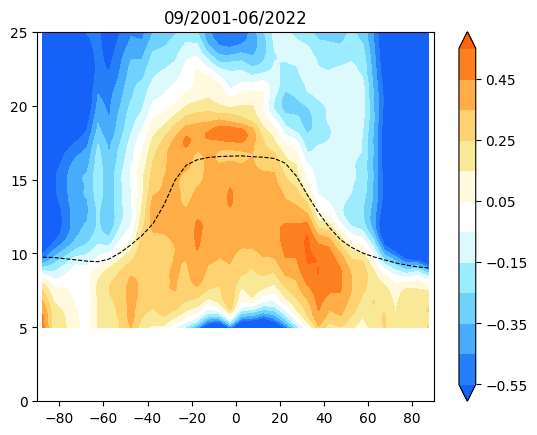

In [2]:
RO_monthly_mean_maps = np.load('/home/bdc2/aodhan/ROM_SAF/ROM_SAF_zm_monthlymean_092002_062022.npy')
RO_anomaly_maps = RO_monthly_mean_maps - np.nanmean(RO_monthly_mean_maps, axis=0)
RO_anomaly_ts = np.reshape(RO_anomaly_maps, (np.shape(RO_anomaly_maps)[0]*np.shape(RO_anomaly_maps)[1], 
                                             np.shape(RO_anomaly_maps)[2], np.shape(RO_anomaly_maps)[3]))
decadal_trend_map = decadal_trend_finder(RO_anomaly_ts)

levels = np.arange(-.55,.56,.1)
heights = np.linspace(5,35,301)
lats = np.arange(-87.5,92.5,5)
plt.contourf(lats, heights, decadal_trend_map.T, cmap=custom_cmap, levels=levels, extend='both')
plt.plot(lats, lrz_maps_zm_annual_mean, color='black', linewidth=.8, linestyle='dashed')
#plt.plot(lats, cpz_maps_zm_annual_mean, color='black', linewidth=.8)
plt.xlim(-90,90)
plt.ylim(0,25)
plt.colorbar()
plt.title('09/2001-06/2022')

# Plot 2 shows trends from 2006-2016 using all data

Text(0.5, 1.0, '01/2006-12/2016')

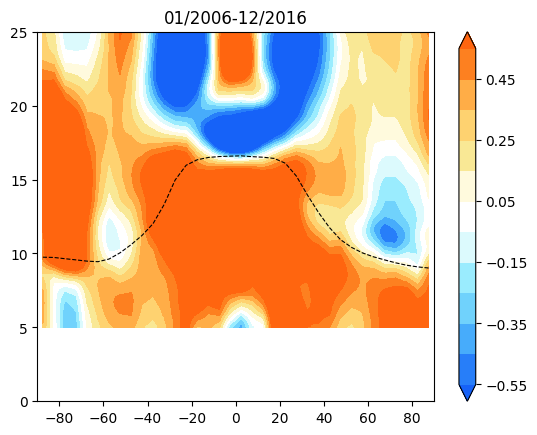

In [3]:
RO_monthly_mean_maps = np.load('/home/bdc2/aodhan/ROM_SAF/ROM_SAF_zm_monthlymean_092002_062022.npy')[6:-6]
RO_anomaly_maps = RO_monthly_mean_maps - np.nanmean(RO_monthly_mean_maps, axis=0)
RO_anomaly_ts = np.reshape(RO_anomaly_maps, (np.shape(RO_anomaly_maps)[0]*np.shape(RO_anomaly_maps)[1], 
                                             np.shape(RO_anomaly_maps)[2], np.shape(RO_anomaly_maps)[3]))
decadal_trend_map = decadal_trend_finder(RO_anomaly_ts)

levels = np.arange(-.55,.56,.1)
heights = np.linspace(5,35,301)
lats = np.arange(-87.5,92.5,5)
plt.contourf(lats, heights, decadal_trend_map.T, cmap=custom_cmap, levels=levels, extend='both')
plt.plot(lats, lrz_maps_zm_annual_mean, color='black', linewidth=.8, linestyle='dashed')
#plt.plot(lats, cpz_maps_zm_annual_mean, color='black', linewidth=.8)
plt.xlim(-90,90)
plt.ylim(0,25)
plt.colorbar()
plt.title('01/2006-12/2016')

# Plot 3 shows temperature trends from 2002-2019 using 2007-2016 baseline (IPCC AR6 version)

(18, 12, 36, 301)


Text(0.5, 1.0, '01/2002-12/2019')

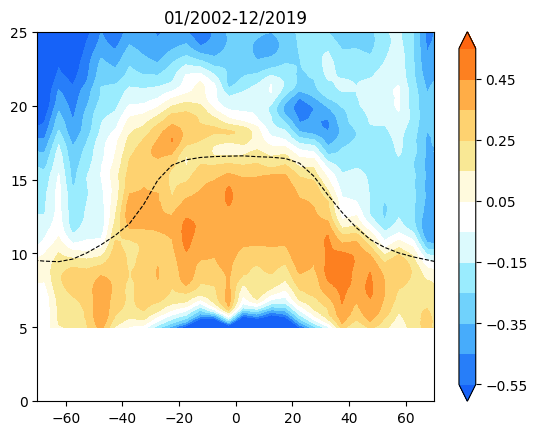

In [4]:
RO_monthly_mean_maps = np.load('/home/bdc2/aodhan/ROM_SAF/ROM_SAF_zm_monthlymean_092002_062022.npy')[:-4]
print(np.shape(RO_monthly_mean_maps))
RO_anomaly_maps = RO_monthly_mean_maps - np.nanmean(RO_monthly_mean_maps[6:-3], axis=0)
RO_anomaly_ts = np.reshape(RO_anomaly_maps, (np.shape(RO_anomaly_maps)[0]*np.shape(RO_anomaly_maps)[1], 
                                             np.shape(RO_anomaly_maps)[2], np.shape(RO_anomaly_maps)[3]))
decadal_trend_map = decadal_trend_finder(RO_anomaly_ts)

levels = np.arange(-.55,.56,.1)
heights = np.linspace(5,35,301)
lats = np.arange(-87.5,92.5,5)
plt.contourf(lats, heights, decadal_trend_map.T, cmap=custom_cmap, levels=levels, extend='both')
plt.plot(lats, lrz_maps_zm_annual_mean, color='black', linewidth=.8, linestyle='dashed')
#plt.plot(lats, cpz_maps_zm_annual_mean, color='black', linewidth=.8)
plt.xlim(-70,70)
plt.ylim(0,25)
plt.colorbar()
plt.title('01/2002-12/2019')

# Plot 4 shows temperature trends from 2002-2018 using all data baseline (Steiner et al., 2020 version)

(18, 12, 36, 301)


Text(0.5, 1.0, '09/2001-12/2018')

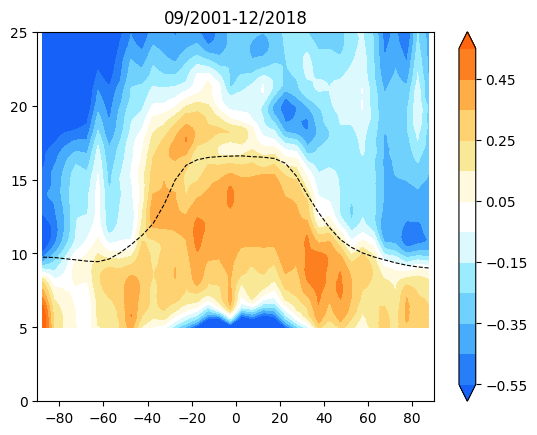

In [5]:
RO_monthly_mean_maps = np.load('/home/bdc2/aodhan/ROM_SAF/ROM_SAF_zm_monthlymean_092002_062022.npy')[:-4]
print(np.shape(RO_monthly_mean_maps))
RO_anomaly_maps = RO_monthly_mean_maps - np.nanmean(RO_monthly_mean_maps, axis=0)
RO_anomaly_ts = np.reshape(RO_anomaly_maps, (np.shape(RO_anomaly_maps)[0]*np.shape(RO_anomaly_maps)[1], 
                                             np.shape(RO_anomaly_maps)[2], np.shape(RO_anomaly_maps)[3]))
decadal_trend_map = decadal_trend_finder(RO_anomaly_ts)

levels = np.arange(-.55,.56,.1)
heights = np.linspace(5,35,301)
lats = np.arange(-87.5,92.5,5)
plt.contourf(lats, heights, decadal_trend_map.T, cmap=custom_cmap, levels=levels, extend='both')
plt.plot(lats, lrz_maps_zm_annual_mean, color='black', linewidth=.8, linestyle='dashed')
#plt.plot(lats, cpz_maps_zm_annual_mean, color='black', linewidth=.8)
plt.xlim(-90,90)
plt.ylim(0,25)
plt.colorbar()
plt.title('09/2001-12/2018')